# **第3章 機械学習の手順を理解しよう**

# 06　データを準備する


架空のサンプルデータを作る： リスト3.1

In [ ]:
from sklearn.datasets import make_blobs
# ランダムの種が「0」で、特徴量は2つ、塊数は2つ、ばらつき1の、300個のデータセット
X, y = make_blobs(
    random_state=0,
    n_features=2,
    centers=2,
    cluster_std=1,
    n_samples=300)

特徴量（X）でデータフレームを作る： リスト3.2

In [ ]:
import pandas as pd

# 特徴量（X）でデータフレームを作り、分類（y）をtargetの列として追加
df = pd.DataFrame(X)
df["target"] = y
df.head()

,0,1,target
0,3.359415,5.248267,0
1,2.931100,0.782556,1
2,1.120314,5.758061,0
3,2.876853,0.902956,1
4,1.666088,5.605634,0


データの分布を視覚的に確認： リスト3.3

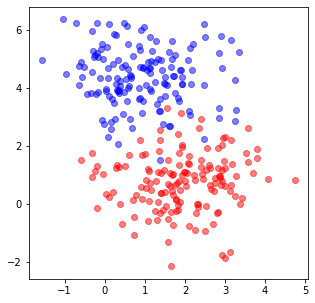

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# 分類によって、別々のデータフレームに分ける
df0 = df[df["target"]==0]
df1 = df[df["target"]==1]
# 分類0は青、分類1は赤で、散布図を描画
plt.figure(figsize=(5, 5))
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.show()

# 07　データを学習用とテスト用に分ける


学習用データ、テスト用データに分ける: リスト3.4

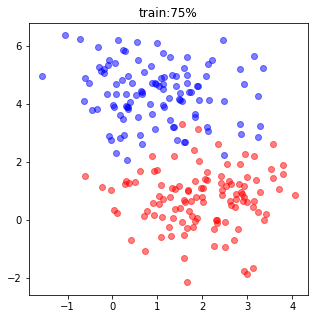

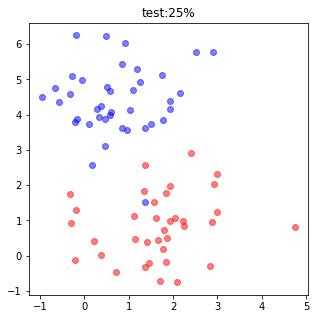

In [ ]:
# 学習用データ、テスト用データに分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

# 学習用の特徴量（X_train）でデータフレームを作り、分類（y_train）をtargetの列として追加
df = pd.DataFrame(X_train)
df["target"] = y_train
# 分類によって、別々のデータフレームに分ける
df0 = df[df["target"]==0]
df1 = df[df["target"]==1]
plt.figure(figsize=(5, 5))
# 分類0は青、分類1は赤で、散布図を描画
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.title("train:75%")
plt.show()

# テスト用の特徴量（X_test）でデータフレームを作り、分類（y_test）をtargetの列として追加
df = pd.DataFrame(X_test)
df["target"] = y_test
# 分類によって、別々のデータフレームに分ける
df0 = df[df["target"]==0]
df1 = df[df["target"]==1]
plt.figure(figsize=(5, 5))
# 分類0は青、分類1は赤で、散布図を描画
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.title("test:25%")
plt.show()

# 08　モデルを選んで、学習する

サポートベクターマシンで学習モデルを作る：リスト 3.5

In [ ]:
from sklearn import svm
# サポートベクターマシンで学習モデルを作る
model = svm.SVC()
# 学習用データを渡して学習する
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 09　モデルをテストする

テスト用データのすべてで予測する：　リスト3.6

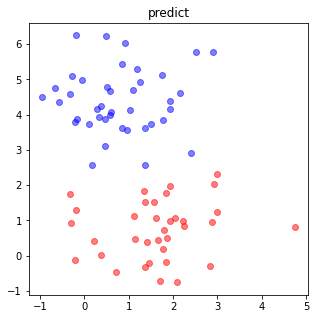

In [ ]:
# テスト用データのすべてで予測する
pred = model.predict(X_test)

# テスト用の特徴量（X_test）でデータフレームを作り、予測結果（pred）をtargetの列として追加
df = pd.DataFrame(X_test)
df["target"] = pred
# 分類によって、別々のデータフレームに分ける
df0 = df[df["target"]==0]
df1 = df[df["target"]==1]
# 分類0は青、分類1は赤で、散布図を描画
plt.figure(figsize=(5, 5))
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.title("predict")
plt.show()

正解率を調べる：　リスト3.7

In [ ]:
from sklearn.metrics import accuracy_score

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

正解率: 96.0 %


# 10　新しい値を渡して、予測する

新たな値を渡して、答えを予測(predict)させる： リスト3.8

In [ ]:
# 説明変数が「1 と 3」、の結果を予測
pred = model.predict([[1,3]])
print("1,3=",pred)

# 説明変数が「1 と 2」、の結果を予測
pred = model.predict([[1,2]])
print("1,2=",pred)

1,3= [0]
1,2= [1]


散布図上に、[1,3]、[1,2]の位置にXを描画： リスト 3.9

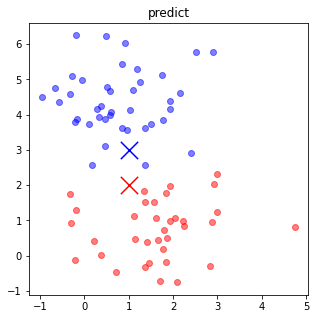

In [ ]:
# 散布図上に、［1,3］、［1,2］の位置にXを描画
plt.figure(figsize=(5, 5))
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.scatter([1], [3], color="b", marker="x", s=300)
plt.scatter([1], [2], color="r", marker="x", s=300)
plt.title("predict")
plt.show()

## 11　分類の状態を可視化しよう


pcolormeshを使って、表示範囲を分割して塗りつぶす： リスト3.10

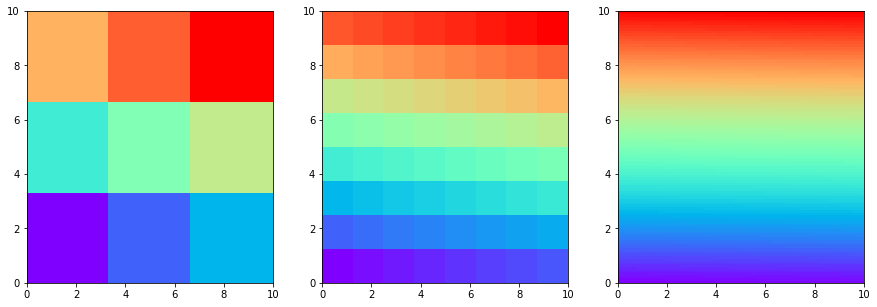

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplots(figsize=(15, 5))

# pcolormeshを使うと、表示範囲を分割して塗りつぶすことができる
# 3x3、8x8、100x100と細かくするほどなめらかになる
sizelist = [3,8,100]
for i in range(3):
    size=sizelist[i]
    X, Y = np.meshgrid(np.linspace(0, 10, size+1),
                       np.linspace(0, 10, size+1))
    C = np.linspace(0,100,size*size).reshape(size, size)
    plt.subplot(1, 3, i+1)
    plt.pcolormesh(X, Y, C, cmap="rainbow")

plt.show()

 分類の状態を描く関数： リスト3.11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 散布図に分類の状態を描画する関数
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    # 点と塗りのカラーマップ
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])

    plt.figure(figsize=(5, 5))
    # モデルがあれば、表示範囲の点をすべて予測して色を塗る
    if model:
        # 表示範囲を少し広げて分割し、調べる点（200x200）を用意する
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        # すべての点の値を、モデルで予測する
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #　予測結果の値（0〜2）の色（cmap_fills）で塗りつぶす
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        #　境界を灰色で塗る
        plt.contour(XX, YY, pred, colors="gray") 
    #　targetの値（0〜2）の色（cmap_dots）で点を描画する
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

ものを2種類に分類する学習の「学習した状態の散布図」を描画する： リスト3.12

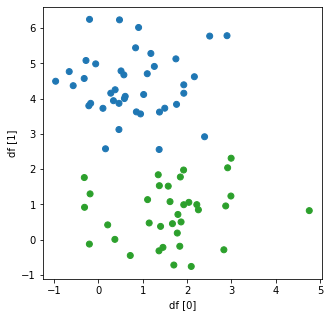

In [ ]:
# テスト用の特徴量（X_test）でデータフレームを作る
df = pd.DataFrame(X_test)

# テスト用の特徴量（X_test）を渡して、予測データを作る
pred = model.predict(X_test)

# 散布図だけを描画する
plot_boundary(None, df[0], df[1], pred, "df [0]", "df [1]")

分類の状態を描画する: リスト3.13

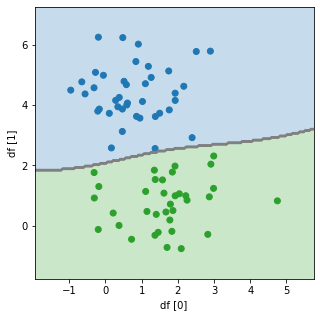

In [ ]:
# 分類の状態を描画する
plot_boundary(model, df[0], df[1], pred, "df [0]", "df [1]")

三日月型のデータセットで描画する：　リスト3.14

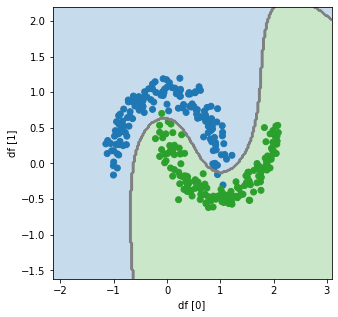

In [ ]:
from sklearn.datasets import make_moons

# ランダムの種が3、ノイズ0.1、300個の三日月型のデータセット
X, y = make_moons(random_state=3,
                  noise=0.1,
                  n_samples=300)
# 特徴量データ（X)で、データフレームを作り
df = pd.DataFrame(X)
# モデルを作って学習する
model = svm.SVC()
model.fit(X, y)
# 分類の状態を描画する
plot_boundary(model, df[0], df[1], ｙ, "df [0]", "df [1]")

二重円型のデータセットで描画する： リスト3.15

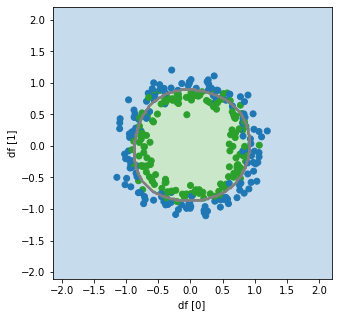

In [ ]:
from sklearn.datasets import make_circles

# ランダムの種が3、ノイズ0.1、300個の二重円型のデータセット
X, y = make_circles(random_state=3,
                    noise = 0.1,
                    n_samples=300)
# 特徴量データ（X)で、データフレームを作り
df = pd.DataFrame(X)
# モデルを作って学習する
model = svm.SVC()
model.fit(X, y)
# 分類の状態を描画する
plot_boundary(model, df[0], df[1], ｙ, "df [0]", "df [1]")